Read the data into a data frame

In [2]:
import pandas as pd
df = pd.read_csv('airBoxData.csv')

Display all records sorted by the PM2.5 values.

In [3]:
import pandas as pd
df = pd.read_csv('airBoxData.csv')
sort = df.sort_values('PM2.5')
print(sort)

              siteID  year  month  day  hour  weekday    gps_lat     gps_lon  \
23470   74DA38AF490C  2020      7   19    13        7  22.654000  120.285000   
127455  74DA38EBF5FC  2020      7   23    23        4  22.335000  120.367000   
127456  74DA38EBF5FC  2020      7   24     0        5  22.335000  120.367000   
99884   74DA38EBF5E6  2020      7   18    23        6  24.118000  120.652000   
99885   74DA38EBF5E6  2020      7   19     0        7  24.118000  120.652000   
...              ...   ...    ...  ...   ...      ...        ...         ...   
64829   74DA38F7C26E  2020      7   23    10        4  24.997000  121.313000   
59673   74DA38EBF6AE  2020      7   23     4        4  23.716000  120.252000   
48667   08BEAC0288D6  2020      7   21     2        2  24.983695  121.250315   
48694   08BEAC0288D6  2020      7   24     1        5  24.983695  121.250315   
85440   08BEAC0AB772  2020      7   18     5        6  24.126391  120.667134   

             PM10        Tmp      PM2.5

Calculate and show how many devices in each city.

In [5]:
import pandas as pd
df = pd.read_csv('airBoxData.csv')
cnt = df.groupby('area')['siteID'].nunique()
print(cnt)

area
changhua           53
chiayi_city        13
chiayi_county      18
hsinchu_city       19
hsinchu_county     22
kaohsiung          82
keelung             5
miaoli             38
nantou             24
new_taipei        129
pingtung           20
taichuang         253
tainan             51
taipei            126
taitung             2
taoyuan            31
yilan              16
yunlin             13
Name: siteID, dtype: int64


Display the average PM2.5 values (over the whole time span) of each device and sort them by the PM2.5 values. You can identity which device location with the best/worst PM2.5 quality and observe some  unreasonable measurements.

In [36]:
import pandas as pd
df = pd.read_csv('airBoxData.csv')
grouped = df.groupby(['siteID','area'])
avg = grouped['PM2.5'].mean()
sort_avg = avg.sort_values()
print(sort_avg)

siteID        area        
74DA38E2B622  taichuang        0.000000
74DA38AF486A  kaohsiung        0.000000
74DA38B050CC  changhua         0.000000
74DA38B05352  yilan            0.000000
74DA38B05436  taipei           0.000000
                                ...    
74DA38F7C26E  new_taipei      38.275570
74DA38EBF8AC  tainan          41.464293
08BEAC028920  new_taipei      42.182840
74DA38AF483E  hsinchu_city    48.537561
08BEAC0288D6  new_taipei      66.692419
Name: PM2.5, Length: 915, dtype: float64


–	Display the average PM2.5 values (over the whole time span) of each city and sort them by the PM2.5 values. You can identity which city has the best/worst air quality

In [38]:
import pandas as pd
df = pd.read_csv('airBoxData.csv')
grouped = df.groupby(['area'])
avg = grouped['PM2.5'].mean()
sort = avg.sort_values()
print(sort)

area
taitung            2.770677
yilan              5.453694
chiayi_city        6.490991
kaohsiung          7.082535
yunlin             7.133232
tainan             7.352566
chiayi_county      7.557860
changhua           8.160436
nantou             8.363522
hsinchu_city       8.484143
taichuang          8.514756
hsinchu_county     9.111924
taoyuan            9.504175
taipei            10.051272
pingtung          10.404558
miaoli            12.079954
keelung           12.633222
new_taipei        13.591451
Name: PM2.5, dtype: float64


Calculate the average PM2.5 of each day within each city. List the results by sorting average PM2.5 values in an ascending order within each city, i.e. you should put average PM2.5 values of the same city together. (We do not mind the order among cities). You can identity which day has the best/worst air quality in each city.

In [55]:
import pandas as pd
df = pd.read_csv('airBoxData.csv')
grouped = df.groupby(['area','day'])
avg = grouped['PM2.5'].mean()
sort = avg.sort_values()
print(sort)

area        day
taitung     21      1.385185
            23      1.391888
            22      1.956292
            24      2.417130
            20      2.543455
                     ...    
new_taipei  19     15.724026
miaoli      23     16.921788
new_taipei  23     17.466700
pingtung    23     17.526157
keelung     23     18.019676
Name: PM2.5, Length: 126, dtype: float64


Calculate average PM 2.5 values (all devices in Taiwan) of each hour on Friday and do the same thing for Saturday. List the results by a table. The table has three columns whose names should be “hour”, “Friday_PM2.5” and “Saturday_PM2.5”. The result should be sorted by “hour” in an ascending order You can observe the difference of air quality change over time between Friday and Saturday

In [1]:
import pandas as pd
df = pd.read_csv('airBoxData.csv')

fri_sort = df[df['weekday']==5].groupby('hour')
sat_sort = df[df['weekday']==6].groupby('hour')
fri_avg = fri_sort['PM2.5'].mean()
sat_avg = sat_sort['PM2.5'].mean()

new_df = pd.DataFrame({
    'hours' : fri_avg.index,
    'Friday_PM2.5' : fri_avg,
    'Saturday_PM2.5' : sat_avg
})
print(new_df)

      hours  Friday_PM2.5  Saturday_PM2.5
hour                                     
0         0      8.379282        7.859925
1         1      8.379035        6.512187
2         2      8.102212        5.709651
3         3      8.131230        5.874490
4         4      8.259331        5.608954
5         5      8.725270        5.801975
6         6      9.560076        5.970190
7         7      9.953535        5.653011
8         8      9.133940        4.870171
9         9      8.991955        4.837723
10       10     10.243132        5.215046
11       11     10.898488        6.003420
12       12     11.130155        6.303721
13       13      9.053625        6.405692
14       14      7.619646        6.363282
15       15      6.901259        6.573889
16       16      5.995774        6.385970
17       17      6.323988        7.191829
18       18      6.621482        8.304383
19       19      7.754749        8.945591
20       20      8.307870        9.569890
21       21      8.190150       10

Is the PM2.5 related to PM1.0? You should choose and create a visualization to support your answer. (15pts)

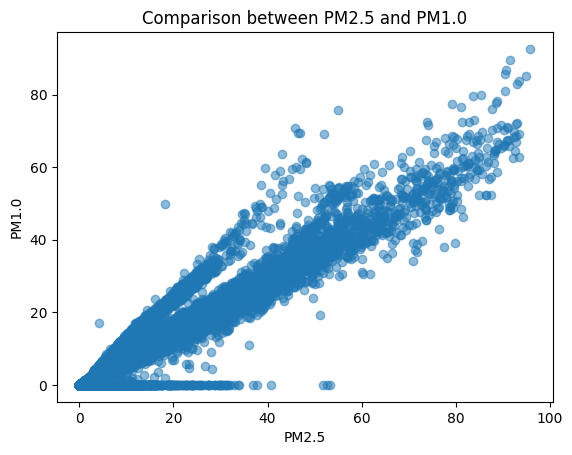

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('airBoxData.csv')
pm25 = df['PM2.5']
pm10 = df['PM1.0']

plt.scatter(pm25, pm10, alpha=0.5)
plt.title('Comparison between PM2.5 and PM1.0')
plt.xlabel('PM2.5')
plt.ylabel('PM1.0')

correlation = np.corrcoef(pm25, pm10)[0, 1]
plt.show()


Among Taipei, Pingtung, Nantou and Taichuang, which city has the most significant difference PM2.5 change pattern over the whole day on July 24 from the other three cities? You should choose and create a visualization to support your answer. 

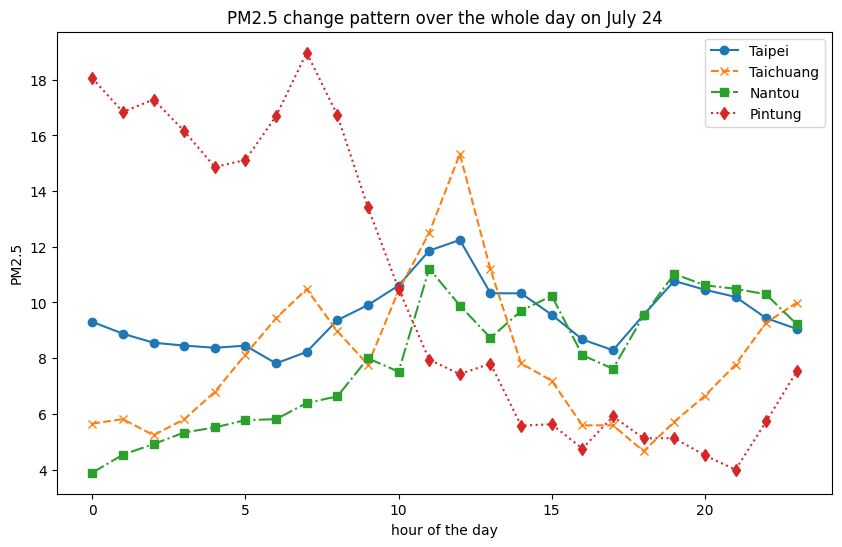

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('airBoxData.csv')

tpe = df[(df['month']==7)&(df['day']==24)&(df['area']=="taipei")].groupby('hour')["PM2.5"].mean()
txg = df[(df['month']==7)&(df['day']==24)&(df['area']=="taichuang")].groupby('hour')["PM2.5"].mean()
ntc = df[(df['month']==7)&(df['day']==24)&(df['area']=="nantou")].groupby('hour')["PM2.5"].mean()
pif = df[(df['month']==7)&(df['day']==24)&(df['area']=="pingtung")].groupby('hour')["PM2.5"].mean()

plt.figure(figsize=(10,6))
plt.plot(tpe.index,tpe.values, marker='o', linestyle='-' , label = 'Taipei')
plt.plot(txg.index,txg.values, marker='x', linestyle='--' , label = 'Taichuang')
plt.plot(ntc.index,ntc.values, marker='s', linestyle='-.' , label = 'Nantou')
plt.plot(pif.index,pif.values, marker='d', linestyle=':', label = 'Pintung')

plt.title('PM2.5 change pattern over the whole day on July 24')
plt.xlabel('hour of the day')
plt.ylabel('PM2.5')

plt.legend()
plt.show()


Remove all records whose PM2.5 is 0 (simple data cleaning process to remove impossible data values)

In [4]:
import pandas as pd
df = pd.read_csv('airBoxData.csv')
new_df = df.drop(df[df['PM2.5']==0].index)

Collect all records from Taipei and draw a histogram to shows how many hour PM2.5 records in each histogram bin interval. Set the histogram bin count to 100, the min value to 0 and max value to 100 to create the histogram. 

Ans: Tainan has a better air quality overall, since its max hours of PM2.5 in the 0-20 interval is lower than Taipei.

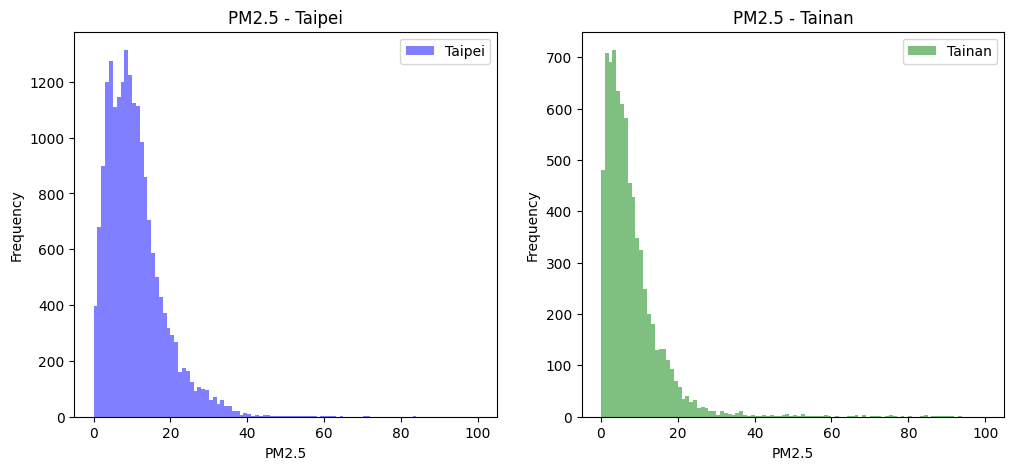

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = new_df

taipei_data = df[df['area']=='taipei']
tainan_data = df[df['area']=='tainan']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5)) 

ax1.hist(taipei_data['PM2.5'], bins=100, range=(0, 100), alpha=0.5, color='blue', label='Taipei')
ax1.set_xlabel('PM2.5')
ax1.set_ylabel('Frequency')
ax1.set_title('PM2.5 - Taipei')
ax1.legend()

ax2.hist(tainan_data['PM2.5'], bins=100, range=(0, 100), alpha=0.5, color='green', label='Tainan')
ax2.set_xlabel('PM2.5')
ax2.set_ylabel('Frequency')
ax2.set_title('PM2.5 - Tainan')
ax2.legend()

plt.show()
